In [23]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

from pypower import CatalogFFTPower, PowerSpectrumSmoothWindow, PowerSpectrumSmoothWindowMatrix
from mockfactory import Catalog, utils
import pycorr

sys.path.append('../bin')
from power_spectrum import plot_power, select_region, get_rdd, get_mean_poles, plot_comparison

import os
plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

## Load two point counter

In [65]:
data_dir = '/global/cfs/cdirs/desi/users/mpinon/secondGenMocksY1/ddcounts/'
fn_fibered = 'DD_rppi_mock{:d}_ELG_LOP_ffa_SGC_0.8_1.6_smax4.npy'
fn_complete = 'DD_rppi_mock{:d}_ELG_LOP_complete_SGC_0.8_1.6_smax4.npy'
nmocks = 17

counter_fibered = [pycorr.TwoPointCounter.load(data_dir+fn_fibered.format(i)).rebin((5, 1)) for i in range(nmocks)]
counter_complete = [pycorr.TwoPointCounter.load(data_dir+fn_complete.format(i)).rebin((5, 1)) for i in range(nmocks)]

In [53]:
counter_fibered[0].size1, counter_complete[0].size1

(639570, 4531023)

In [54]:
counter_fibered[0].size2, counter_complete[0].size2

(639570, 4531023)

In [55]:
counter_complete[0].size1/counter_fibered[0].size1

7.084483324733806

In [56]:
rp = counter_fibered[0].sepavg()

In [57]:
np.sum(counter_complete[0].wcounts[rp < 2.5]) / counter_complete[0].wnorm

5.048181567342721e-07

## Plot $DD^{fibered}/DD^{complete}$ as a function of $r_p$

In [58]:
counter_complete[0].wcounts

array([[  51.,   57.,   55., ...,   55.,   57.,   51.],
       [ 138.,  136.,  128., ...,  128.,  136.,  138.],
       [ 238.,  229.,  238., ...,  238.,  229.,  238.],
       ...,
       [6409., 6367., 6432., ..., 6432., 6367., 6409.],
       [6431., 6385., 6538., ..., 6538., 6385., 6431.],
       [6457., 6639., 6591., ..., 6591., 6639., 6457.]])

In [59]:
counter_complete[0].wnorm

array(2.05301649e+13)

In [60]:
counter_fibered[0].wnorm

array(2.00434051e+13)

In [61]:
2e13/counter_fibered[0].wnorm

0.9978344456640281

In [72]:
dd_fibered = np.mean(np.array([np.sum(counter_fibered[i].wcounts, axis=1)/counter_fibered[i].wnorm for i in range(nmocks)]), axis=0)
dd_complete = np.mean(np.array([np.sum(counter_complete[i].wcounts, axis=1)/counter_complete[i].wnorm for i in range(nmocks)]), axis=0)

In [73]:
fc_window_mocks = dd_fibered / dd_complete

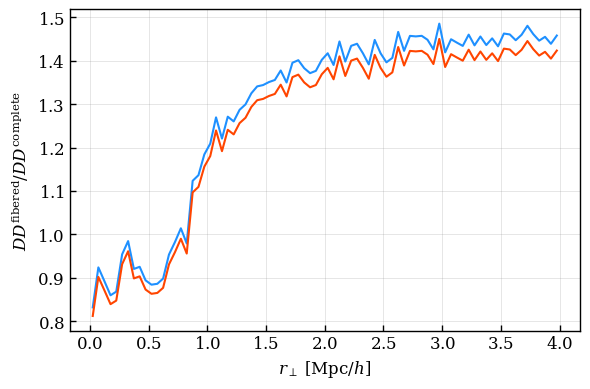

In [74]:
plt.plot(rp, fc_window_mocks)
plt.xlabel(r'$r_{\perp}$ [$\mathrm{Mpc}/h$]')
plt.ylabel(r'$DD^{\mathrm{fibered}}/DD^{\mathrm{complete}}$')
#plt.savefig(os.path.join(plots_dir, 'dd_fibered_to_dd_complete.png'), dpi=200)
plt.show()

## Plot $RR^{fibered}/RR^{complete}$ as a function of $r_p$

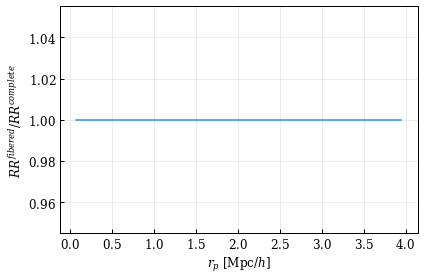

In [63]:
fn_fibered = 'RR_rp_mock{:d}_ELG_NGC_short.npy'
fn_complete = 'RR_rp_mock{:d}_ELG_complete_NGC_short.npy'

rr_fibered = np.sum(pycorr.TwoPointCounter.load(data_dir+fn_fibered.format(0)).wcounts, axis=1)
rr_complete = np.sum(pycorr.TwoPointCounter.load(data_dir+fn_fibered.format(0)).wcounts, axis=1)

fc_window_rr = rr_fibered / rr_complete

plt.plot(rp, fc_window_rr)
plt.xlabel(r'$r_p$ [$\mathrm{Mpc}/h$]')
plt.ylabel(r'$RR^{fibered}/RR^{complete}$')
#plt.savefig('rr_fibered_to_rr_complete.png', dpi=200)
plt.show()

In [102]:
gamma = 1. / fc_window_mocks[-1]

In [103]:
def fc_window_model(rp, r1, r2, max_val=1):
    res = np.full_like(rp, 1)
    res[rp > r2] = 0
    cond = (rp > r1) & (rp <= r2)
    res[cond] = (rp[cond] - r2) / (r1 - r2)
    return res*max_val

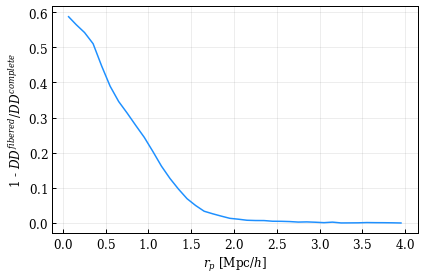

In [112]:
plt.plot(rp, 1 - gamma * fc_window_mocks, label='Mocks')
#plt.plot(rp, fc_window_model(rp, 0., 1.8, max_val=0.6), label='Model')
#plt.plot([0., 1.4, 2.5], [0.6, 0.07, 0.], label='Model')
plt.xlabel(r'$r_p$ [$\mathrm{Mpc}/h$]')
plt.ylabel(r'1 - $DD^{fibered}/DD^{complete}$')
#plt.legend()
plt.savefig('dd_fibered_to_dd_complete_window.png', dpi=200)
plt.show()

In [116]:
res = 1 - gamma * fc_window_mocks
np.save('fc_window_ELG_NGC', [rp[rp < 2.5], res[rp < 2.5]])

In [114]:
test = np.load('fc_window_ELG_NGC.npy')

In [115]:
test

array([[0.06643629, 0.15501341, 0.25286392, 0.35280324, 0.45244281,
        0.55165194, 0.65148788, 0.75122169, 0.85118248, 0.95107466,
        1.05096517, 1.15081814, 1.25083127, 1.35059067, 1.45068531,
        1.55031284, 1.65040925, 1.7505887 , 1.85050844, 1.95040875,
        2.05034762, 2.15042286, 2.25036055, 2.35046039, 2.45043089],
       [0.58715722, 0.56461329, 0.54210522, 0.51031694, 0.44706115,
        0.38939562, 0.34577786, 0.3126732 , 0.2776892 , 0.24362353,
        0.20366246, 0.16200472, 0.12679027, 0.09640577, 0.06911402,
        0.04982314, 0.03345407, 0.02614575, 0.01952357, 0.01327646,
        0.01077327, 0.00777256, 0.00702159, 0.00688892, 0.00496631]])

In [117]:
 1 - gamma * fc_window_mocks

array([5.87157222e-01, 5.64613292e-01, 5.42105220e-01, 5.10316945e-01,
       4.47061146e-01, 3.89395623e-01, 3.45777860e-01, 3.12673203e-01,
       2.77689203e-01, 2.43623534e-01, 2.03662462e-01, 1.62004724e-01,
       1.26790269e-01, 9.64057736e-02, 6.91140206e-02, 4.98231352e-02,
       3.34540736e-02, 2.61457486e-02, 1.95235736e-02, 1.32764644e-02,
       1.07732728e-02, 7.77255753e-03, 7.02158888e-03, 6.88891715e-03,
       4.96630556e-03, 4.76929191e-03, 4.04576745e-03, 2.59845204e-03,
       3.08615974e-03, 2.15860160e-03, 9.25722759e-04, 2.42118936e-03,
       1.35383468e-04, 2.87477611e-04, 4.84951699e-04, 1.20960850e-03,
       9.06757914e-04, 7.91347450e-04, 5.08064487e-04, 0.00000000e+00])